# Chapter 4

## Raster Data Formats

Open world.tif and get some info:

In [1]:
from osgeo import gdal
from osgeo.gdalconst import *

dataset = gdal.Open("data/world.tif")
if dataset is None:
    raise IOError("Error opening dataset")

In [2]:
M = dataset.GetGeoTransform()
M

(-180.0, 0.17578125, 0.0, 90.0, 0.0, -0.17578125)

In [7]:
def pixelToMap(gt, pos):
    return (gt[0] + pos[0] * gt[1] + pos[1] * gt[2],  gt[3] + pos[0] * gt[4] + pos[1] * gt[5])

In [8]:
def mapToPixel(gt, pos):
    return (int((pos[0] - gt[0]) / gt[1]),  int((pos[1] - gt[3]) / gt[5]))

In [5]:
mapToPixel(M, (47.3, 7.4))

(1293, 469)

In [9]:
pixelToMap(M, (1293, 469))

(47.28515625, 7.55859375)

In [10]:
width = dataset.RasterXSize
height = dataset.RasterYSize

print(width, height)

2048 1024


In [11]:
bands = dataset.RasterCount

print(bands)

3


In [12]:
redband = dataset.GetRasterBand(1)
greenband = dataset.GetRasterBand(2)
blueband = dataset.GetRasterBand(3)

In [13]:
reddata = redband.ReadAsArray()
greendata = greenband.ReadAsArray()
bluedata = blueband.ReadAsArray()

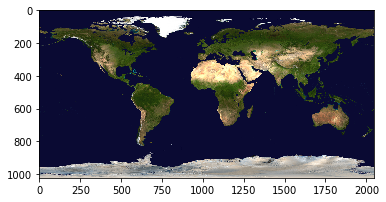

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

rgb = np.dstack((reddata,greendata,bluedata))
plt.imshow(rgb, interpolation='nearest');

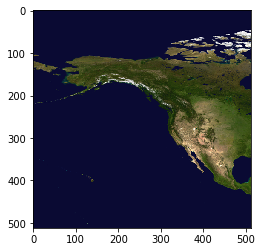

In [16]:
r = redband.ReadAsArray(0,0,512,512)  
g = greenband.ReadAsArray(0,0,512,512)
b = blueband.ReadAsArray(0,0,512,512)

rgb = np.dstack((r,g,b))
plt.imshow(rgb, interpolation='nearest')

## Vector Data Formats

In [17]:
import ogr

filename = "data/populated_places/ne_10m_populated_places.shp"
dataset = ogr.Open(filename, 0)

if dataset is None:
    raise IOError("Can't open dataset")

layer = dataset.GetLayer(0)
layerDefinition = layer.GetLayerDefn()
print("Layer Name:", layerDefinition.GetName())

Layer Name: ne_10m_populated_places


In [18]:
for i in range(layerDefinition.GetFieldCount()):
    layerDef = layerDefinition.GetFieldDefn(i)
    fieldName =  layerDef.GetName()
    fieldTypeCode = layerDef.GetType()
    fieldType = layerDef.GetFieldTypeName(fieldTypeCode)
    fieldWidth = layerDef.GetWidth()
    GetPrecision = layerDef.GetPrecision()
    print(i, fieldName, fieldType, str(fieldWidth), str(GetPrecision))

0 SCALERANK Integer 4 0
1 NATSCALE Integer 4 0
2 LABELRANK Integer 4 0
3 FEATURECLA String 50 0
4 NAME String 100 0
5 NAMEPAR String 254 0
6 NAMEALT String 254 0
7 DIFFASCII Integer 4 0
8 NAMEASCII String 100 0
9 ADM0CAP Real 19 11
10 CAPIN String 15 0
11 WORLDCITY Real 19 11
12 MEGACITY Integer 4 0
13 SOV0NAME String 100 0
14 SOV_A3 String 3 0
15 ADM0NAME String 50 0
16 ADM0_A3 String 3 0
17 ADM1NAME String 50 0
18 ISO_A2 String 5 0
19 NOTE String 254 0
20 LATITUDE Real 19 11
21 LONGITUDE Real 19 11
22 CHANGED Real 19 11
23 NAMEDIFF Integer 4 0
24 DIFFNOTE String 254 0
25 POP_MAX Integer 9 0
26 POP_MIN Integer 9 0
27 POP_OTHER Integer 9 0
28 RANK_MAX Integer 9 0
29 RANK_MIN Integer 9 0
30 GEONAMEID Real 19 11
31 MEGANAME String 50 0
32 LS_NAME String 41 0
33 LS_MATCH Integer 4 0
34 CHECKME Integer 4 0
35 MAX_POP10 Real 19 0
36 MAX_POP20 Real 19 0
37 MAX_POP50 Real 19 0
38 MAX_POP300 Real 19 0
39 MAX_POP310 Real 19 0
40 MAX_NATSCA Real 19 0
41 MIN_AREAKM Real 19 0
42 MAX_AREAKM Real 19

In [19]:
layer.ResetReading()
i=0
for feature in layer:
    point = feature.geometry()
    x = point.GetX()
    y = point.GetY()
    name = feature.GetField('NAME')
    population = feature.GetField('POP_MAX')
    print(name, population, x, y)
    i += 1
    if i==10:
        break

Colonia del Sacramento 21714 -57.84000247340134 -34.47999900541754
Trinidad 21093 -56.90099656015872 -33.5439989373607
Fray Bentos 23279 -58.3039974719095 -33.1389990288435
Canelones 19698 -56.28400149324307 -34.538004006675465
Florida 32234 -56.21499844799416 -34.09900200521719
Bassar 61845 0.7890035737781318 9.26100006831723
Sotouboua 21054 0.9849964623313099 8.557002133057097
Medenine 61705 10.4166995575967 33.399999002467325
Kebili 19875 8.9710025379012 33.689997034920566
Tataouine 62577 10.466703589415545 33.00000315432084


In [20]:
layer.ResetReading()
i=0
for feature in layer:
    geomRef = feature.GetGeometryRef()
    output = geomRef.ExportToWkt()
    print(output)
    i += 1
    if i>=10:
        break

POINT (-57.8400024734013 -34.4799990054175)
POINT (-56.9009965601587 -33.5439989373607)
POINT (-58.3039974719095 -33.1389990288435)
POINT (-56.2840014932431 -34.5380040066755)
POINT (-56.2149984479942 -34.0990020052172)
POINT (0.789003573778132 9.26100006831723)
POINT (0.98499646233131 8.5570021330571)
POINT (10.4166995575967 33.3999990024673)
POINT (8.9710025379012 33.6899970349206)
POINT (10.4667035894155 33.0000031543208)
